In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

student_data = pd.read_csv('student_data.csv')
student_data.head()
#quick view of the dataset

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [2]:
student_data.info()
#understand the data types I'm dealing with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [15]:
print("There are:", student_data.shape[0], 'rows.')
print("There are:", student_data.shape[1], 'columns.')
#know total amount of rows and columns

There are: 4424 rows.
There are: 35 columns.


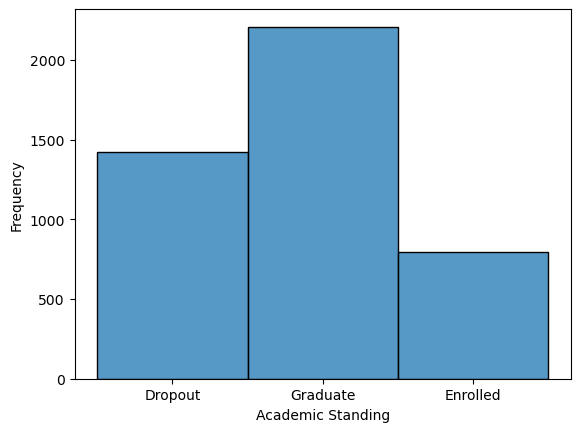

In [16]:
sns.histplot(data=student_data, x='Target')
plt.xlabel('Academic Standing')
plt.ylabel('Frequency')
plt.show()
#I wanted to know the amount of grads/enrolled/dropouts

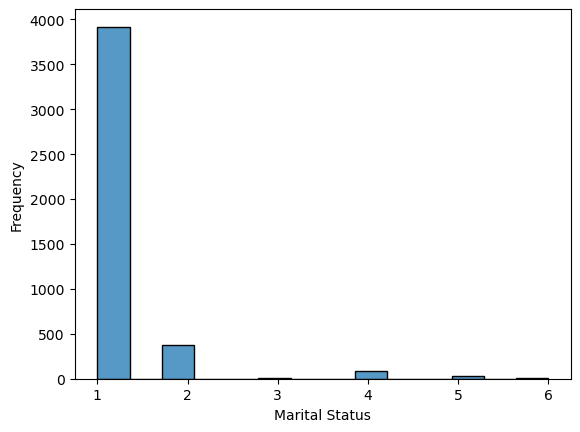

In [17]:
sns.histplot(data=student_data, x='Marital status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()
#Just did this to look

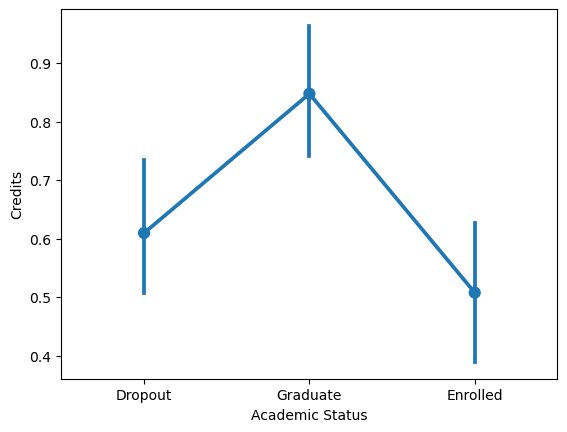

In [18]:
sns.pointplot(data=student_data, x='Target', y='Curricular units 1st sem (credited)')
plt.xlabel('Academic Status')
plt.ylabel('Credits')
plt.show()
#trying to see if an initial view of credited credits and academic status correlate

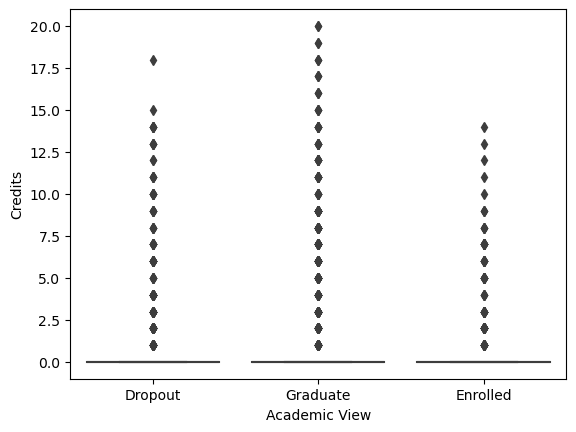

In [19]:
sns.boxplot(data=student_data, x='Target', y='Curricular units 1st sem (credited)')
plt.xlabel('Academic View')
plt.ylabel('Credits')
plt.show()
#trying to see if an initial view of credited credits and academic status correlate

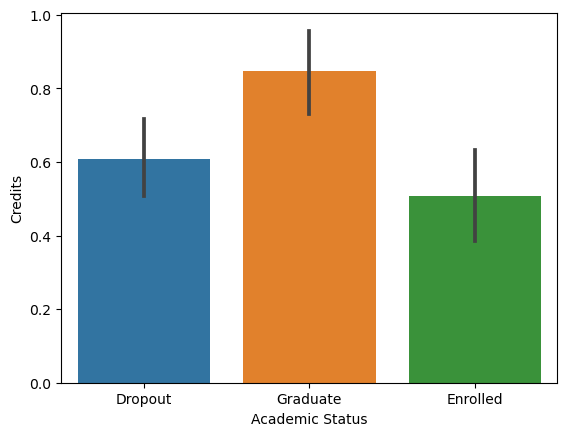

In [20]:
sns.barplot(data=student_data, x='Target', y='Curricular units 1st sem (credited)')
plt.xlabel('Academic Status')
plt.ylabel('Credits')
plt.show()

#trying to see if an initial view of credited credits and academic status correlate

In [21]:
student_data["Target"].describe

<bound method NDFrame.describe of 0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object>

In [10]:
student_data.corr()
#show me the correlations!

Marital status  \
Marital status                                        1.000000   
Application mode                                      0.224855   
Application order                                    -0.125854   
Course                                                0.018925   
Daytime/evening attendance                           -0.274939   
Previous qualification                                0.120925   
Nacionality                                          -0.020722   
Mother's qualification                                0.185522   
Father's qualification                                0.128326   
Mother's occupation                                   0.069734   
Father's occupation                                   0.024351   
Displaced                                            -0.234886   
Educational special needs                            -0.028343   
Debtor                                                0.034304   
Tuition fees up to date                              -0.087158   
Gender                                               -0.014738   
Scholarship holder                                   -0.053765   
Age at enrollment                                     0.522717   
International                                        -0.027905   
Curricular units 1st sem (credited)                   0.061209   
Curricular units 1st sem (enrolled)                   0.052107   
Curricular units 1st sem (evaluations)                0.058030   
Curricular units 1st sem (approved)                  -0.031027   
Curricular units 1st sem (grade)                     -0.059811   
Curricular units 1st sem (without evaluations)        0.034711   
Curricular units 2nd sem (credited)                   0.062831   
Curricular units 2nd sem (enrolled)                   0.039026   
Curricular units 2nd sem (evaluations)                0.022784   
Curricular units 2nd sem (approved)                  -0.043739   
Curricular units 2nd sem (grade)                     -0.071506   
Curricular units 2nd sem (without evaluations)        0.020426   
Unemployment rate                                    -0.020338   
Inflation rate                                        0.008761   
GDP                                                  -0.027003   

                                                Application mode  \
Marital status                                          0.224855   
Application mode                                        1.000000   
Application order                                      -0.246497   
Course                                                 -0.085116   
Daytime/evening attendance                             -0.268616   
Previous qualification                                  0.433028   
Nacionality                                            -0.001360   
Mother's qualification                                  0.092867   
Father's qualification                                  0.072798   
Mother's occupation                                     0.033489   
Father's occupation                                     0.001253   
Displaced                                              -0.263079   
Educational special needs                              -0.030868   
Debtor                                                  0.114348   
Tuition fees up to date                                -0.127339   
Gender                                                  0.147226   
Scholarship holder                                     -0.152818   
Age at enrollment                                       0.450700   
International                                           0.005050   
Curricular units 1st sem (credited)                     0.238269   
Curricular units 1st sem (enrolled)                     0.159547   
Curricular units 1st sem (evaluations)                  0.219154   
Curricular units 1st sem (approved)                    -0.023713   
Curricular units 1st sem (grade)                       -0.106213   
Curricular units 1st sem (without eva

In [11]:
sns.pairplot(student_data)
#view the pairs though honestly this is impossible to look at..

<AxesSubplot:>

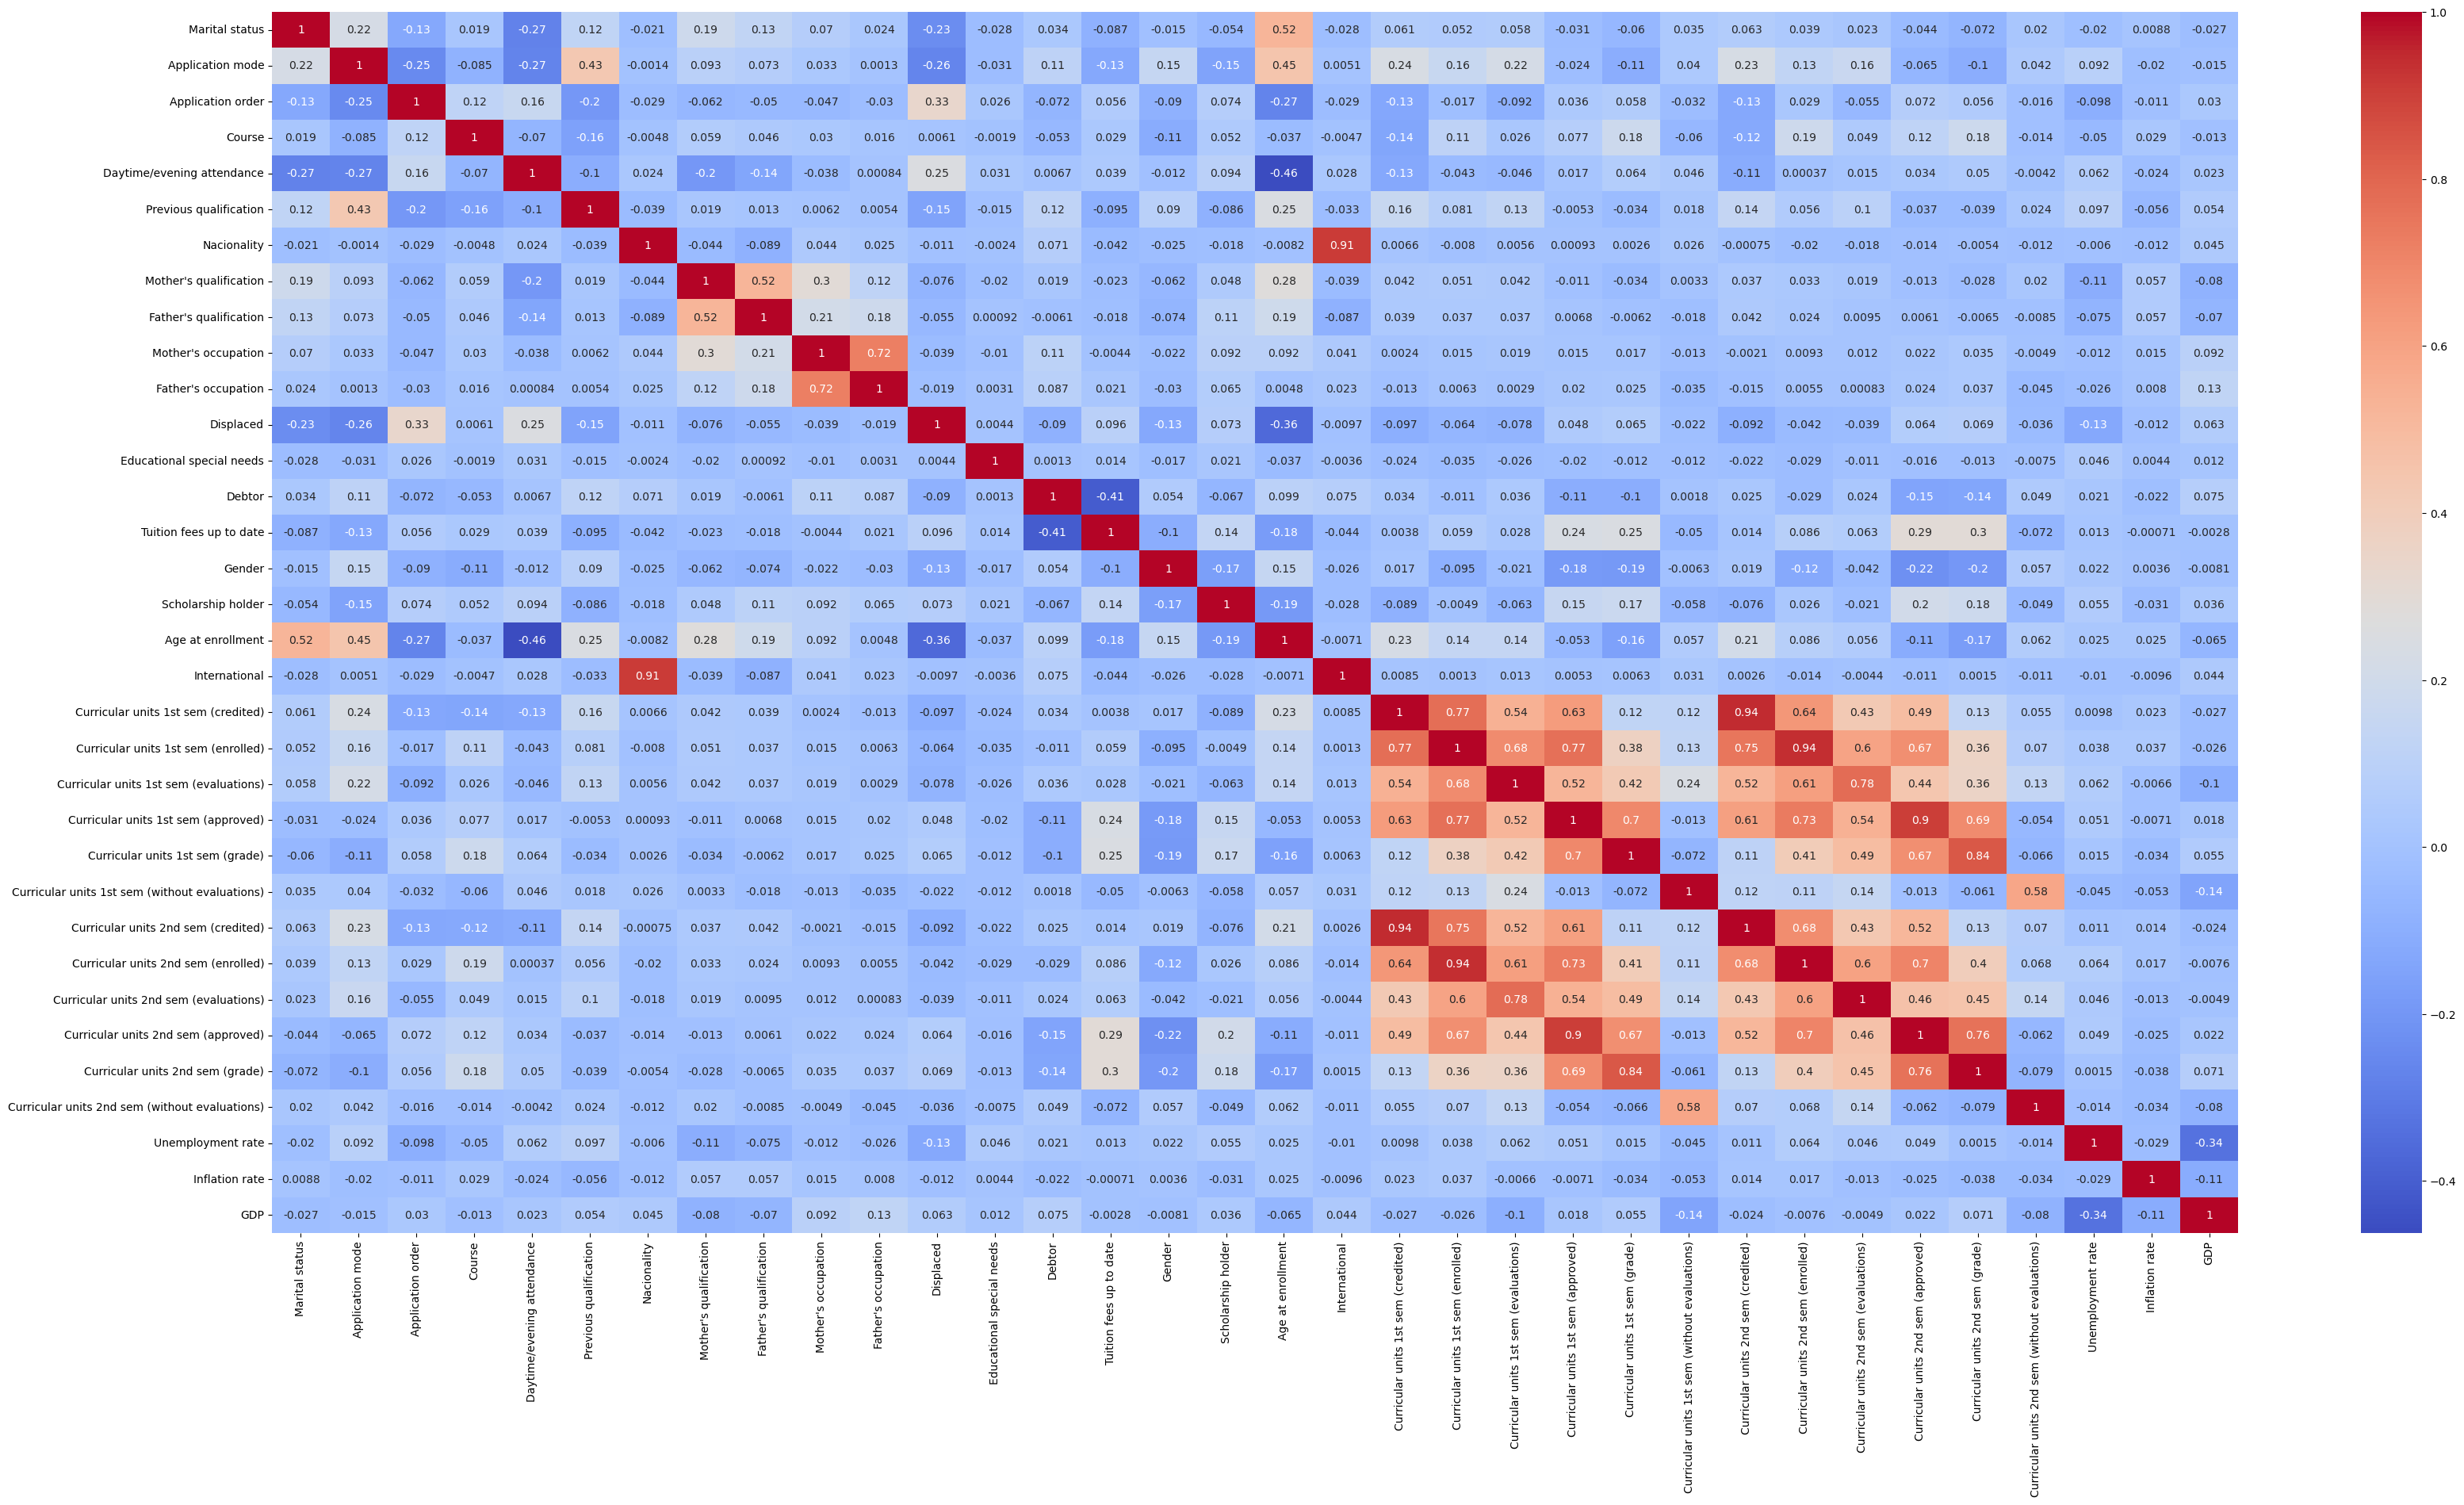

In [12]:
plt.figure(figsize=(40,20))

sns.heatmap(student_data.corr(), annot=True, cmap="coolwarm")
#nice, pretty heatmap to really see the correlations

This gives me a view of a lot of fields that are correlated to eachother. Age and marital status, makes sense. International and nationality, also makes sense. The curricular units all seem to be correlated to eachother, status in the 1st semester tends to correlate to a similar status in the 2nd semester. Mother and father occupation seem to correlate. Maybe I'm missing it, but I'm not really seeing anything particularly unexpected or overly interesting. I had the initial thought that age at enrollment, previous qualifications, or special needs as a few examples would have correlations between things - but I'm not seeing anything that would be beneficial towards predicting success/drop out rates from these variables. I think I'm overthinking this though, I'm not supposed to deep dive into the analysis, I'm just exploring right now.

Sidenote, most of my data is categorical, so that's been different to work with as opposed to most of the lessons in this course

<AxesSubplot:xlabel='Curricular units 1st sem (credited)', ylabel='Curricular units 2nd sem (credited)'>

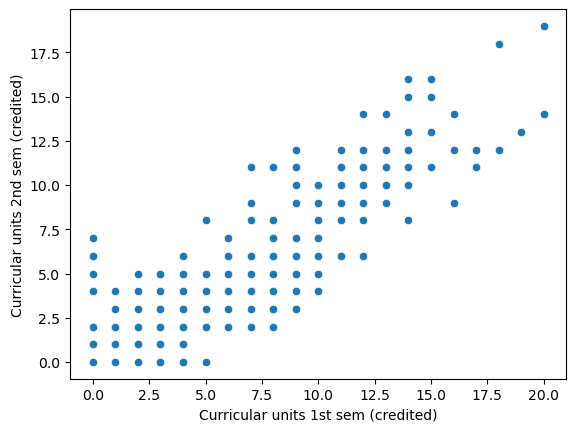

In [13]:
sns.scatterplot(x="Curricular units 1st sem (credited)", y="Curricular units 2nd sem (credited)", data=student_data)
#just an example of the positive correlation